# The Event-Related Potential *for the practicing neuroscientist*

<div class="alert alert-block alert-info">
*Synopsis* <br><br>

**Data:** 1 s of scalp EEG data sampled at 500 Hz during 1,000 trials in two conditions.<br>

**Goal:** Characterize the response of the EEG in the two conditions.<br>

**Tools:** Visualization, event-related potential, confidence intervals, bootstrapping.

</div>

## Background

In [ ]:
# BACKGROUND VIDEO

Voltage recordings from the scalp surface - the electroencephalogram or EEG - provide a powerful window into brain voltage activity.  Some of the earliest human EEG recording occurred in 1924, when Dr. Hans Berger made a remarkable discovery:  the EEG of a human subject at rest with eyes closed exhibits rhythmic activity, an approximately 10 Hz oscillation he labeled the alpha rhythm.  Although now studied for nearly 100 years, the definitive functional role (if any) of the alpha rhythm remains unknown.  Since then, many other EEG rhythms have been detected and labelled (typically with Greek letters) and the analysis of EEG rhythms remains an active area of research. 

Compared to other modalities for measuring brain activity, the EEG possesses both advantages and disadvantages.  Perhaps the most important advantages are:

1. The EEG is non-invasive, and
2. The EEG permits a high temporal resolution (on the order of milliseconds).
But, the EEG measure also suffers from significant disadvantages, the most devastating being the poor spatial resolution;  a single scalp electrode detects the summed activity from approximately 10 cm<sup>2</sup> of cortex.

In this chapter, we consider EEG data recorded from a single scalp electrode.  We will analyze these data to determine what (if any) activity is evoked following two different types of stimuli presented to a human subject.  In doing so, we will continue to develop our skills in MATLAB, and begin to see how this powerful tool can help us understand these time series data.  We begin with a brief description of the EEG data.

## Case Study: an EEG ERP task
An undergraduate student volunteers to participate in a psychology study at his university. In this study, EEG electrodes (sampling rate 500 Hz, i.e., 500 samples per second) are placed on the student's scalp, and he is seated in a comfortable chair in a dark, electrically isolated room.  The student is instructed to place headphones over his ears and listen to a series of repeated sounds.  The sounds consist of two tones - either a high pitch tone or a low pitch tone.  A single tone is presented once every few seconds, and the student responds with a button press to the low pitch tone.  The tone presentation is repeated to collect the EEG response to numerous presentations of the two tones, as illustrated here:

<img src="imgs/example_recording.png"></img>

In this cartoon illustration of the EEG experiment, the EEG electrodes are placed on the scalp surface of a human subject (left).  The EEG activity (blue) is recorded as a function of time during presentation of high pitch tones (black) and low pitch tones (orange).

Our collaborator leading this research study has agreed to provide us with EEG data recorded at a single electrode for 1000 presentations of the high pitch tone, and 1000 presentations of the low pitch tone.  In each presentation - or "trial" - she provides us with 1 s of EEG data, such that the tone occurs at 0.25 s into the trial.  She asks us to analyze these data to determine whether the EEG signal differs following the two tone presentations.

In [ ]:
# Case study video

## Loading the Data

Our first step is to load the data into Python.  To do so, we use the function `loadmat()` from the `scipy.io` module as follows,

In [ ]:
import scipy.io as sio
data = sio.loadmat('EEG-1.mat')

To understand the outcome of issuing this command, let's examine the variable `data` now present in the workspace.  This variable is a *dictionary* variable (execute `type(data)` and the result should be `dict`). To see the *keys* of a dictionary, use the `keys()` method.

In [ ]:
data.keys()

The keys that start and end with two underscores ( `__` ) are private and contain information about the MATLAB file. The variables that we are interested in here are `EEGa`, `EEGb`, and `t`. These correspond to the EEG data recorded in the two conditions (i.e., EEGa to condition A and EEGb to condition B) as well as a time axis (t). Let's extract these variables from the `data` dictionary.

In [ ]:
EEGa = data['EEGa']
EEGb = data['EEGb']
t = data['t']

<div class="alert alert-block alert-warning">
In general, a single underscore at the beginning of a variable, function or method indicates that this object should be treated as *private*. Double underscores often indicate that Python will interpret this object with some special instructions. In both cases, for what we are doing, we can usually ignore an object that starts with an underscore.
</div>

Let's use the `whos` command to get some more information about the variables.

In [ ]:
whos

<div class="alert alert-block alert-warning">
We could also have used `EEGa.shape` to find out the dimensions of the variable `EEGa`.
</div>

In the *Data/Info* column we see *1000x500* for `EEGa` and `EEGb`.  Both variables are matrices with 1000 rows and 500 columns.  Our collaborator tells us that each row corresponds to a separate trial, and each column to a point in time.  So there are 1000 total trials, each consisting of 500 time points.  As a matter of convenience, we define a new variable to record the number of trials,

In [ ]:
ntrials = EEGa.shape[0]

The `shape` property of an array is a *tuple* that indicates the size of each dimension. Adding `[0]` at the end tells Python to give us only the first value in the tuple. Recall that Python indexing starts at 0. This variable will be useful later, as we'll see. In fact, we can assign two variables at the same time if we want.

In [30]:
ntrials, nsamples = EEGa.shape

<div class="alert alert-block alert-info">

**Q.** Determine the size of the variable `EEGb`. How many rows and columns does it possess? Which dimension corresponds to trials and which corresponds to time?

</div>

<div class="alert alert-block alert-warning">
A *tuple* is another data structure in Python that is similar to an array or a list because it usually contains more than one element. Python treats each of these structures slightly differently, however. One of the most challenging things about starting with Python is learning to understand the different data structures. Here, we will mainly work with arrays, which are good for holding multidimensional data. If you are curious and want to know more about data structures, there is a very concise description <a href="http://thomas-cokelaer.info/tutorials/python/data_structures.html">here</a> to get you started.
</div>

Both `EEGb` and `EEGa` are complicated variables that contain many elements. To understand these data, we might attempt to read the values contained in each element. For example, we can print out the EEG data for the first trial of condition A

In [33]:
print( EEGa[0, :] )

[ -1.85909632e-01   4.49876010e-01   1.06070801e+00  -4.71265246e-01
   1.68669327e+00   9.38221338e-01   2.21207038e-01   4.05491276e-01
   8.78879665e-01   5.23697825e-01  -2.35240678e+00  -9.24345879e-01
   7.66671797e-01  -4.64254999e-01   6.25953180e-02   1.51917029e+00
  -7.76400815e-01   8.14988739e-01  -1.58137285e-01  -6.17402518e-01
   2.07506393e-01   3.59430871e-01  -1.21455008e+00  -6.16715452e-01
  -4.81362032e-02   3.17982689e-01  -2.77459585e-01   4.14839815e-02
  -1.52257779e+00   1.31993666e+00   1.46836023e+00   1.84666100e+00
   5.23163980e-02   2.05515379e-01   2.27994679e-01  -1.34063464e+00
   5.61451651e-01   1.20391968e+00   1.06398658e+00   4.38748238e-01
   1.64443736e+00  -1.54713823e+00   6.41177787e-01  -1.13319311e+00
   1.06869889e+00   3.88678297e-01  -1.86251056e+00  -1.14074604e+00
  -4.59323117e-01   7.46220184e-01   4.40752835e-01  -7.05129357e-01
  -1.85879610e-01  -4.52021194e-02  -7.74389189e-01   1.55051475e+00
   1.12600755e+00  -1.14703552e+00

In this command, we index the first row of the matrix `EEGa` and print out all columns (corresponding to all moments of time).

<div class="alert alert-block alert-info">

**Q.** Upon issuing this command what do you find? Does the printout help you understand these data?<br><br>

**A.** You should observe a list of 500 numbers that begins <br><br>

    `-1.85909632e-01   4.49876010e-01   1.06070801e+00  -4.71265246e-01   1.68669327e+00   9.38221338e-01 ...`<br><br>
    
We might conclude that these numbers exhibit variability (i.e., the values are both positive and negative), but examining the data in this way is not particularly useful. For example, determining trends in th ebehavior (such as intervals of repeated activity) through inspection of these printed numbers alone is extremely difficult.

</div>

Printing out the data to the screen is not useful in this case. How else can we deepen our understanding of these data? Let’s make a plot. Fortunately, plotting the data is easily done in Python:

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

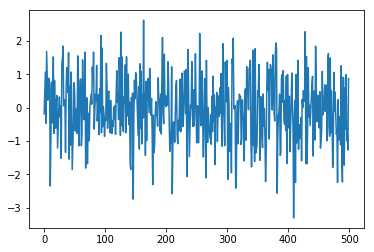

In [35]:
plt.plot(EEGa[0, :]) # Plot the data from condition A, trial 1.
plt.show()

Visualizing the data in this way, we immediately notice many features. First, let’s consider the axes. The horizontal axis extends from 1 to 500. This corresponds to the 500 columns in the variable EEGa. It would be more informative to plot the EEG data as a function of time rather than indices. Fortunately, we possess a variable `t` in the workspace that corresponds to the time axis. Determining the size of the variable `t`, we find it is a vector with 1 row and 500 columns. Each column corresponds to a point in time. 

<div class="alert alert-block alert-info">
**Q.** Plot the variable `t`. What is its range? 
</div>

This corresponds to the 1 s of EEG data recorded in each trial. We can also use the variable t to determine the sampling interval,

In [55]:
dt = t[0, 1] - t[0, 0]  # Determine the sampling interval

The new variable `dt` corresponds to the time between samples.

<div class="alert alert-block alert-info">
<p>
**Q.** What is the value of `dt`? We were told by our collaborator that the sampling frequency is 500 Hz. Is the value of `dt` consistent with this sampling frequency?
</p>
<br>
<p>
**A.** Yes, it is consistent. We find that dt is 0.002 s, or 2 ms. The sampling frequency of 500 Hz corresponds to one sample of the EEG data every 1/(500 Hz) = 2 ms. If the two were not consistent, we would return to our collaborator and figure out what has gone wrong. In general, it’s useful to ask such questions along the way to make sure we understand the formatting of the data and catch any potentially serious misunderstandings early in the analysis.
</p>
</div>

We can now combine the time axis with the EEG data to make a more complete plot. Let’s also label the axes and give the plot a title.

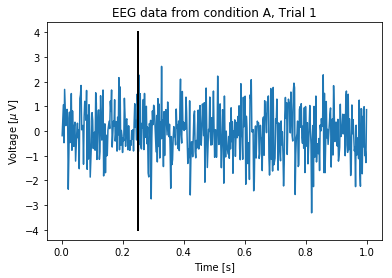

In [79]:
fig, ax = plt.subplots()
ax.plot(t[0], EEGa[0, :])    # Plot condition A, trial 1 data vs t.
plt.xlabel('Time [s]')         # Label the x-axis as time.
plt.ylabel('Voltage [$\mu$ V]')  # Label the y-axis as voltage.
plt.title('EEG data from condition A, Trial 1')  # Add a title

# Add a vertical line to indicate the stimulus time
ax.plot([0.25, 0.25], [-4,4], 'k', lw=2)

plt.show()

This plot provides a nice summary of the data in the first trial of condition A. A visual inspection of the plot suggests that these data exhibit complicated activity. We know from our collaborator that the stimulus occurs at time 0.25 s in each trial. Note how we indicated this time as a vertical line in the plot above. This command includes additional options that make the line black (`'k'`) and a bit wider (`lw=2`). 

<div class="alert alert-block alert-info">
**Q.** What else, if anything, can you say about the single trial of EEG data plotted above? Does the visual inspection reveal any particular change in the EEG activity following the stimulus presentation?
</div>

So far we have visualized only the data from condition A. Because we are interested in whether the EEG behaves differently in the two conditions, visualizing both conditions simultaneously would be of use. We can do this as follows:

In [89]:
# Change to notebook visualization so that we can 
# stretch the plot to see details
%matplotlib inline 

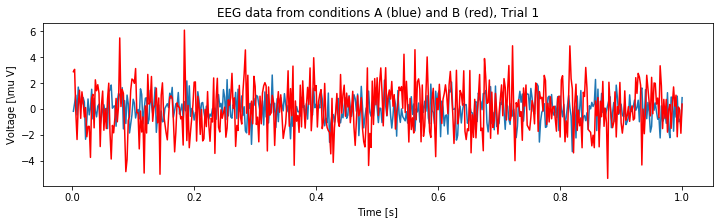

In [94]:
plt.figure(figsize=(12, 3)) # Resize the figure to make it easier to see
plt.plot(t[0],EEGa[0,:])    # Plot condition A, trial 1, data vs t,
plt.plot(t[0],EEGb[1,:], 'r')   # ... data from condition B, trial 1,
plt.xlabel('Time [s]')          # Label the x-axis as time.
plt.ylabel('Voltage [\mu V]')   # Label the y-axis as voltage.
plt.title('EEG data from conditions A (blue) and B (red), Trial 1')
plt.show()

<div class="alert alert-block alert-info">
**Q.** Compare the voltage traces from the first trial of conditions A and B as plotted above. What similarities and differences do you observe?
</div>

<div class="alert alert-block alert-info">
**Q.** The analysis has so far focused only on the first trial. Repeat this visual inspection of the data for different trials. What do you find? What similarities and differences exist between the two conditions across trials?
</div>